In [2]:
import numpy as np
%matplotlib inline

### Define 5 tetra for a cube and 5 test points
Define a unit cube e.g origin 0,0,0 and maximum 1,1,1

Specify the tetrahedrons by splitting the cube up into 5 tetras

In [3]:
nodes = np.array([[0,0,0],
                  [1,0,0],
                  [0,1,0],
                 [0,0,1],
                 [1,0,1],
                 [0,1,1],
                  [1,1,0],
                  [1,1,1]
                 ])
tetra = np.array([
            [0, 6, 5, 4],
            [0, 4, 5, 3],
            [4, 6, 7, 5],
            [0, 1, 6, 4],
            [0, 6, 5, 2]])
# tetra = np.array([ #even
#             [1, 2, 3, 7],
#             [1, 6, 7, 2],
#             [0, 1, 2, 3],
#             [3, 7, 5, 2],
#             [1, 7, 3, 4]])

# tetra = np.array([[0,4,5,3],
#                       [4,6,7,5],
#                       [0,1,6,4],
#                       [0,6,5,4],
#                       [0,6,5,2]])

points = nodes[tetra]
pos = np.array([[.125,.125,.9],
                    [.9, .9, .9],
                    [.9, .2, .125],
                    [.5, .5, .75],
                    [.125, .9, .125]
                   ])

### Test points for each tetra

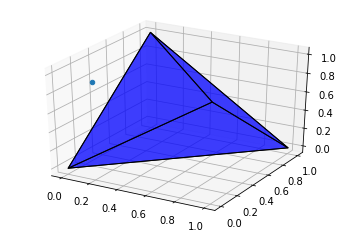

(1, 3)
(5,)
[False False False  True False]


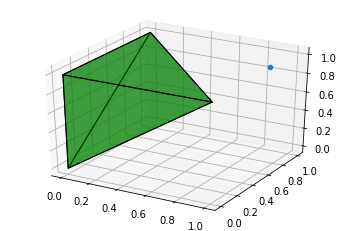

(1, 3)
(5,)
[ True False False False False]


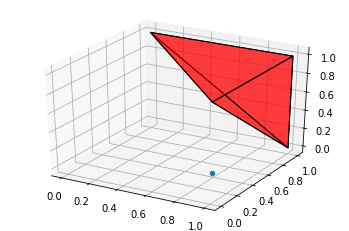

(1, 3)
(5,)
[False  True False False False]


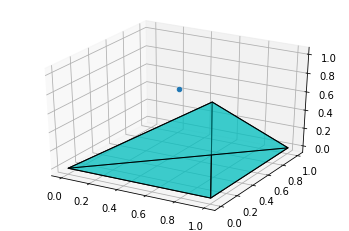

(1, 3)
(5,)
[False False  True False False]


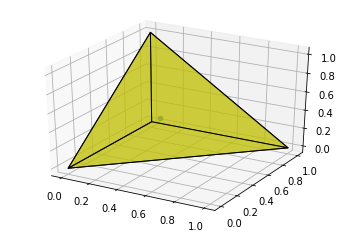

(1, 3)
(5,)
[False False False False  True]


In [5]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
colours  = ['b','g','r','c','y']
for c in range(5):#c = 4
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    trimask = [[0,1,2],[0,1,3],[1,2,3],[0,2,3]]
    # for c in range(len(colours)):
    for i in range(4):
        temp = nodes[None,tetra[c][trimask[i]]]
        # print(temp)
        # verts = [[nodes[0,triangles[0]],nodes[1,triangles[0]],nodes[2,triangles[0]]]]
        # print(verts)
        ax.add_collection(Poly3DCollection(temp,facecolors=colours[c],edgecolors='k',alpha=0.5))
    ax.scatter(pos[c,0],pos[c,1],pos[c,2])
    plt.show()
    points = np.array([nodes[tetra[c]]])
    vap = pos[:,:] - points[:, 0,:]
    vbp = pos[:,:] - points[:, 1, :]
    #         # vcp = p - points[:, 2, :]
    #         # vdp = p - points[:, 3, :]

    vab = points[:,  1, :] - points[ :, 0, :]
    vac = points[:,  2, :] - points[ :, 0, :]
    vad = points[:,  3, :] - points[ :, 0, :]
    vbc = points[:,  2, :] - points[ :, 1, :]
    vbd = points[:,  3, :] - points[ :, 1, :]
    print(vab.shape)
    va = np.einsum('ij, ij->i', vbp, np.cross(vbd, vbc, axisa=1, axisb=1)) / 6.
    vb = np.einsum('ij, ij->i', vap, np.cross(vac, vad, axisa=1, axisb=1)) / 6.
    vc = np.einsum('ij, ij->i', vap, np.cross(vad, vab, axisa=1, axisb=1)) / 6.
    vd = np.einsum('ij, ij->i', vap, np.cross(vab, vac, axisa=1, axisb=1)) / 6.

    v = np.einsum('ij, ij->i', vab, np.cross(vac, vad, axisa=1, axisb=1)) / 6.
    c = np.zeros((va.shape[0],4))
    print(va.shape)
    c[:,0] = va / v
    c[:,1]= vb / v
    c[:,2] = vc / v
    c[:,3] = vd / v

    print(np.all(c>0,axis=1))

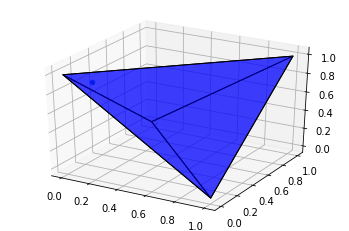

(1, 3)
(5,)
[ True  True  True  True  True]


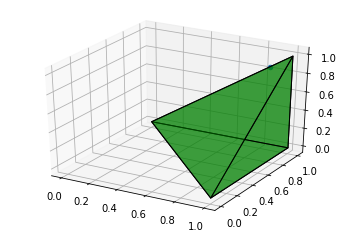

(1, 3)
(5,)
[False False False False False]


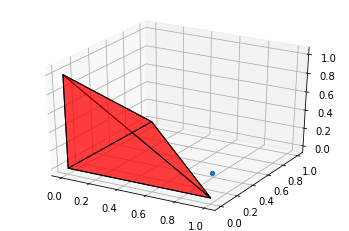

(1, 3)
(5,)
[False False False False False]


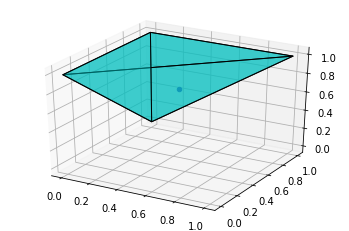

(1, 3)
(5,)
[False False False False False]


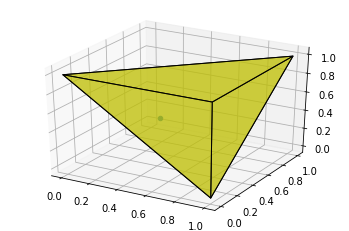

(1, 3)
(5,)
[False False False False False]


In [6]:
tetra = np.array([ #even
            [1, 2, 3, 7],
            [1, 6, 7, 2],
            [0, 1, 2, 3],
            [3, 7, 5, 2],
            [1, 7, 3, 4]])
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
colours  = ['b','g','r','c','y']
for c in range(5):#c = 4
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    trimask = [[0,1,2],[0,1,3],[1,2,3],[0,2,3]]
    # for c in range(len(colours)):
    for i in range(4):
        temp = nodes[None,tetra[c][trimask[i]]]
        # print(temp)
        # verts = [[nodes[0,triangles[0]],nodes[1,triangles[0]],nodes[2,triangles[0]]]]
        # print(verts)
        ax.add_collection(Poly3DCollection(temp,facecolors=colours[c],edgecolors='k',alpha=0.5))
    ax.scatter(pos[c,0],pos[c,1],pos[c,2])
    plt.show()
    points = np.array([nodes[tetra[c]]])
    vap = pos[:,:] - points[:, 0,:]
    vbp = pos[:,:] - points[:, 1, :]
    #         # vcp = p - points[:, 2, :]
    #         # vdp = p - points[:, 3, :]

    vab = points[:,  1, :] - points[ :, 0, :]
    vac = points[:,  2, :] - points[ :, 0, :]
    vad = points[:,  3, :] - points[ :, 0, :]
    vbc = points[:,  2, :] - points[ :, 1, :]
    vbd = points[:,  3, :] - points[ :, 1, :]
    print(vab.shape)
    va = np.einsum('ij, ij->i', vbp, np.cross(vbd, vbc, axisa=1, axisb=1)) / 6.
    vb = np.einsum('ij, ij->i', vap, np.cross(vac, vad, axisa=1, axisb=1)) / 6.
    vc = np.einsum('ij, ij->i', vap, np.cross(vad, vab, axisa=1, axisb=1)) / 6.
    vd = np.einsum('ij, ij->i', vap, np.cross(vab, vac, axisa=1, axisb=1)) / 6.

    v = np.einsum('ij, ij->i', vab, np.cross(vac, vad, axisa=1, axisb=1)) / 6.
    c = np.zeros((va.shape[0],4))
    print(va.shape)
    c[:,0] = va / v
    c[:,1]= vb / v
    c[:,2] = vc / v
    c[:,3] = vd / v

    print(np.all(c>0,axis=1))

### Now try and do the test on all points

In [4]:
points = np.array(nodes[tetra])
print(points.shape)
vap = pos[:,None,:] - points[None,:, 0,:]
vbp = pos[:,None,:] - points[None,:, 1, :]
#         # vcp = p - points[:, 2, :]
#         # vdp = p - points[:, 3, :]
vab = points[None,:,  1, :] - points[None, :, 0, :]
vac = points[None,:,  2, :] - points[None, :, 0, :]
vad = points[None,:,  3, :] - points[None, :, 0, :]
vbc = points[None,:,  2, :] - points[None, :, 1, :]
vbd = points[None,:,  3, :] - points[None, :, 1, :]


va = np.einsum('ikj, ikj->ik', vbp, np.cross(vbd, vbc, axisa=2, axisb=2)) / 6.
vb = np.einsum('ikj, ikj->ik', vap, np.cross(vac, vad, axisa=2, axisb=2)) / 6.
vc = np.einsum('ikj, ikj->ik', vap, np.cross(vad, vab, axisa=2, axisb=2)) / 6.
vd = np.einsum('ikj, ikj->ik', vap, np.cross(vab, vac, axisa=2, axisb=2)) / 6.

v = np.einsum('ikj, ikj->ik', vab, np.cross(vac, vad, axisa=2, axisb=2)) / 6.
c = np.zeros((va.shape[0],va.shape[1],4))

print(va.shape)
c[:,:,0] = va / v
c[:,:,1]= vb / v
c[:,:,2] = vc / v
c[:,:,3] = vd / v

print(c)

(5, 4, 3)
(5, 5)
[[[ 0.1     0.125   0.125   0.65  ]
  [ 0.875   0.1    -0.85    0.875 ]
  [ 0.875  -0.9     0.125   0.9   ]
  [ 0.425  -0.325   0.45    0.45  ]
  [ 0.875   0.125   0.9    -0.9   ]]

 [[ 0.1     0.9     0.9    -0.9   ]
  [ 0.1     0.1     0.7     0.1   ]
  [ 0.1    -0.9     0.9     0.9   ]
  [-0.35    0.45    0.45    0.45  ]
  [ 0.1     0.9     0.9    -0.9   ]]

 [[ 0.875   0.9     0.2    -0.975 ]
  [ 0.8     0.875  -0.775   0.1   ]
  [ 0.1     0.575   0.2     0.125 ]
  [ 0.3875  0.4875 -0.2875  0.4125]
  [ 0.8     0.9     0.125  -0.825 ]]

 [[ 0.25    0.5     0.5    -0.25  ]
  [ 0.5     0.25   -0.25    0.5   ]
  [ 0.5    -0.75    0.5     0.75  ]
  [ 0.125   0.125   0.375   0.375 ]
  [ 0.5     0.5     0.75   -0.75  ]]

 [[ 0.875   0.125   0.9    -0.9   ]
  [ 0.1     0.875  -0.85    0.875 ]
  [ 0.875  -0.9     0.9     0.125 ]
  [ 0.425   0.45    0.45   -0.325 ]
  [ 0.1     0.125   0.125   0.65  ]]]
